# Importations

In [56]:
import joblib
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
from sklearn.metrics import classification_report
nltk.download('stopwords')
nltk.download('wordnet')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


***Read the Data*** 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
missing_values = ["n/a", "na", "--" , "empty" , "?" , "??" , "---" , "-", "__" , "___" , "___ ___"]
df = pd.read_csv("/content/drive/MyDrive/NLP_PROJECT/spam.csv" , na_values=missing_values)


In [4]:
df

,Label,EmailText
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


***LowerCase***

In [5]:
df['EmailText'] = df['EmailText'].str.lower()


***Sum of the null lines***

In [6]:
df.isnull().sum()


Label        0
EmailText    0
dtype: int64

***Shape of the Data***

In [7]:
df.shape


(5572, 2)

***Display the Data***

In [8]:
df

,Label,EmailText
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...
5568,ham,will ã_ b going to esplanade fr home?
5569,ham,"pity, * was in mood for that. so...any other s..."
5570,ham,the guy did some bitching but i acted like i'd...


In [9]:
print(df.head())


  Label                                          EmailText
0   ham  go until jurong point, crazy.. available only ...
1   ham                      ok lar... joking wif u oni...
2  spam  free entry in 2 a wkly comp to win fa cup fina...
3   ham  u dun say so early hor... u c already then say...
4   ham  nah i don't think he goes to usf, he lives aro...


***Remove all occurrences***

In [10]:
df['EmailText'] = df['EmailText'].str.replace('@[^\s]+', '')

<ipython-input-10-b7926b2cd31d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['EmailText'] = df['EmailText'].str.replace('@[^\s]+', '')


In [11]:
df.head()

,Label,EmailText
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


***Remove Punctuations***



In [12]:
def remove_punctuation(text):
    return ''.join(c for c in text if c not in string.punctuation)

In [13]:
df["EmailText"] = df["EmailText"].apply(remove_punctuation)


In [14]:
df.head()

,Label,EmailText
0,ham,go until jurong point crazy available only in ...
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor u c already then say
4,ham,nah i dont think he goes to usf he lives aroun...


***Remove Stopwords***

In [15]:
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

In [16]:
df['EmailText'] = df['EmailText'].apply(remove_stopwords)

In [17]:
df.head()

,Label,EmailText
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


***Tokenization***

In [18]:
def tokenize_text(col2):
    tokens = nltk.word_tokenize(col2)
    return tokens

In [19]:
df['EmailText'] = df['EmailText'].apply(tokenize_text)

***Lemmatization***

In [20]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(tokens):
 return [lemmatizer.lemmatize(word) for word in tokens]
df['EmailText'] = df['EmailText'].apply(lemmatize_words)

In [21]:
df

,Label,EmailText
0,ham,"[go, jurong, point, crazy, available, bugis, n..."
1,ham,"[ok, lar, joking, wif, u, oni]"
2,spam,"[free, entry, 2, wkly, comp, win, fa, cup, fin..."
3,ham,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"[nah, dont, think, go, usf, life, around, though]"
...,...,...
5567,spam,"[2nd, time, tried, 2, contact, u, u, ã¥â£750, ..."
5568,ham,"[ã, b, going, esplanade, fr, home]"
5569,ham,"[pity, mood, soany, suggestion]"
5570,ham,"[guy, bitching, acted, like, id, interested, b..."


***Class Distribution***

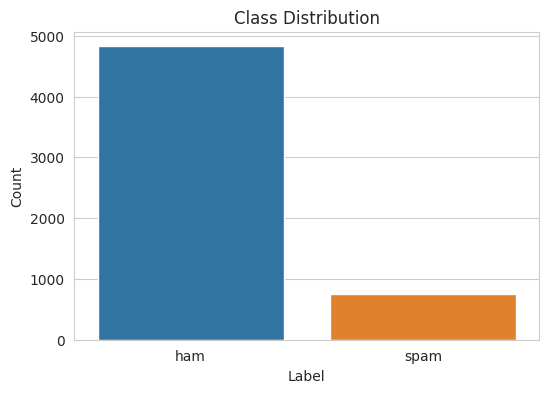

In [22]:
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.countplot(x='Label',data=df)
plt.title('Class Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

***Distribution of Email Text Length***

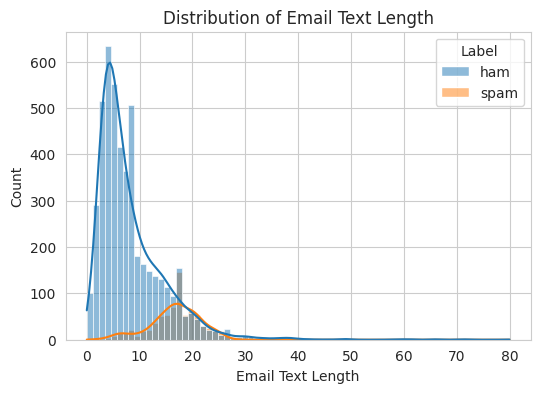

In [23]:
# Create a new feature that stores the length of each email text
df['EmailTextLength'] = df['EmailText'].apply(len)

# Plot a histogram of the email text length
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='EmailTextLength', hue='Label', kde=True)
plt.title('Distribution of Email Text Length')
plt.xlabel('Email Text Length')
plt.ylabel('Count')
plt.show()


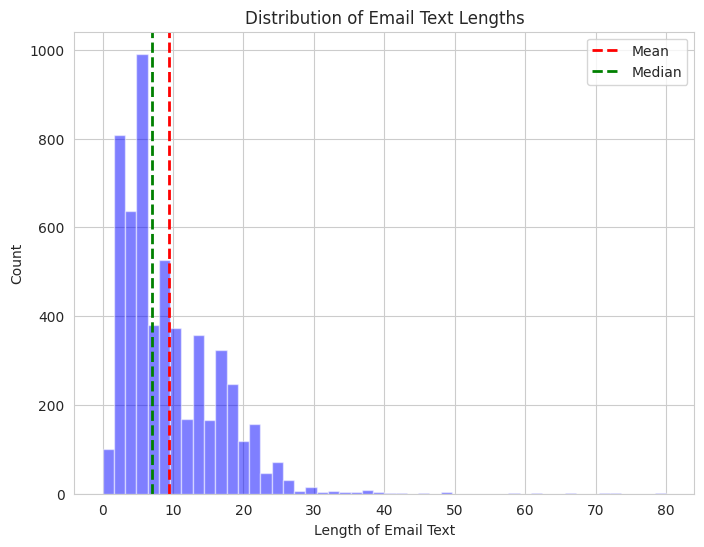

In [24]:
plt.figure(figsize=(8,6))
plt.hist(df['EmailText'].apply(len), bins=50, alpha=0.5, color='blue')
plt.axvline(np.mean(df['EmailText'].apply(len)), color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(np.median(df['EmailText'].apply(len)), color='green', linestyle='dashed', linewidth=2, label='Median')
plt.xlabel('Length of Email Text')
plt.ylabel('Count')
plt.title('Distribution of Email Text Lengths')
plt.legend()
plt.show()


***Most Common Words in Ham & spam email***

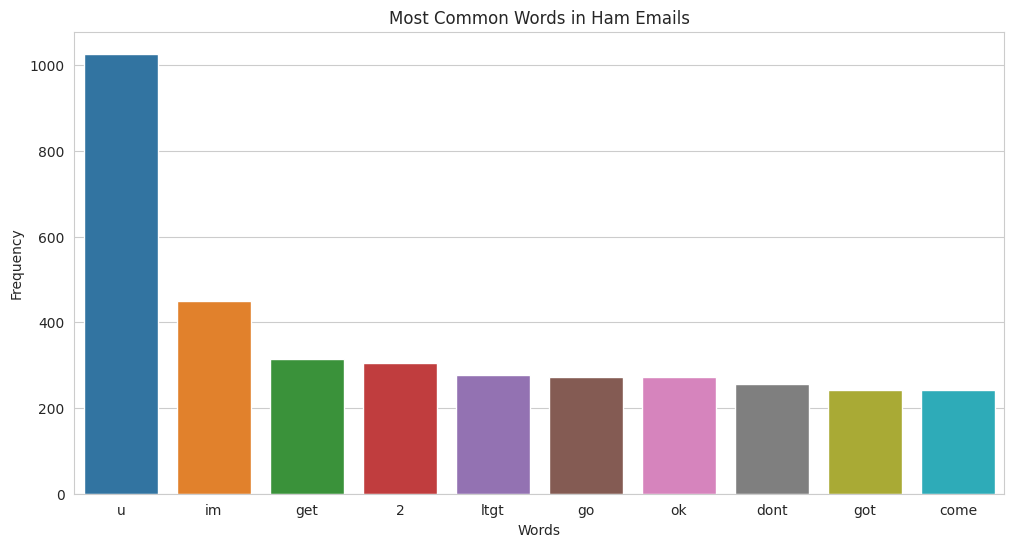

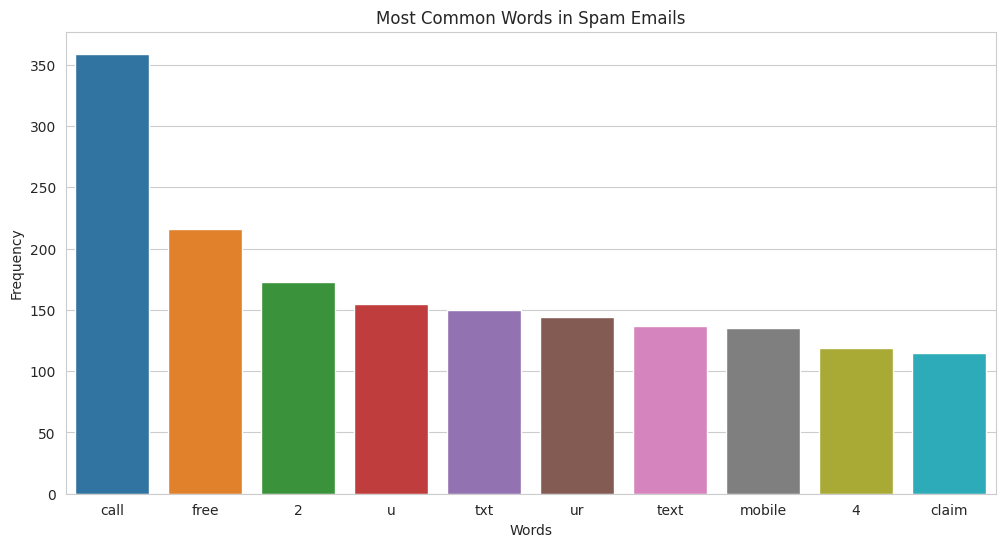

In [25]:
df['EmailText'] = df['EmailText'].apply(lambda x: ' '.join(x))
def get_most_common_words(emails, n=10):
 all_words = ' '.join(emails).split()
 word_freq = Counter(all_words)
 return word_freq.most_common(n)
ham_words = df[df['Label'] == 'ham']['EmailText']
spam_words = df[df['Label'] == 'spam']['EmailText']
ham_common_words = get_most_common_words(ham_words)
spam_common_words = get_most_common_words(spam_words)
def plot_most_common_words(word_freq, title):
 words, frequencies = zip(*word_freq)
 plt.figure(figsize=(12, 6))
 sns.barplot(x=list(words), y=list(frequencies))
 plt.title(title)
 plt.xlabel('Words')
 plt.ylabel('Frequency')
 plt.show()
plot_most_common_words(ham_common_words, 'Most Common Words in Ham Emails')
plot_most_common_words(spam_common_words, 'Most Common Words in Spam Emails')


***TF-IDF***

In [26]:
vectorizer = TfidfVectorizer()

In [27]:
x,y = df['EmailText'],df['Label']
vectorizer = TfidfVectorizer(min_df=50,max_features=5000)


In [28]:
vectors = vectorizer.fit_transform(df['EmailText'])
x = vectors

In [ ]:
# import pickle

# # Save the vectorizer
# with open('/content/drive/MyDrive/NLP_PROJECT/vectorizer.pkl', 'wb') as file:
#     pickle.dump(x, file)


In [ ]:
# import pickle

# # Load the vectorizer from the file
# with open('/content/drive/MyDrive/NLP_PROJECT/vectorizer.pkl', 'rb') as file:
#     v = pickle.load(file)


In [ ]:
#print(type(v))


<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


***Machine Learning***

In [29]:
# Extraction de caractéristiques
x
y = df['Label']


In [30]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Label, Length: 5572, dtype: object

In [31]:
#X
x

<5572x156 sparse matrix of type '<class 'numpy.float64'>'
	with 17059 stored elements in Compressed Sparse Row format>

***Training & testing***

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=60)

***LogisticRegression***

In [33]:
logreg = LogisticRegression(max_iter=300000)


In [34]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=300000)

In [35]:
import joblib

# Save the model
joblib.dump(logreg, '/content/drive/MyDrive/NLP_PROJECT/model.joblib')


['/content/drive/MyDrive/NLP_PROJECT/model.joblib']

In [36]:
import joblib

# Load the model from the file
logreg_load = joblib.load('/content/drive/MyDrive/NLP_PROJECT/model.joblib')


In [37]:
y_pred1 = logreg_load.predict(X_test)


In [38]:
y_pred1


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [39]:
y_pred = logreg.predict(X_test)


In [40]:
y_pred


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

***Accuracy of the Model***

In [41]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9542600896860987


***Classification Report***

In [42]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         ham       0.96      0.99      0.97       957
        spam       0.91      0.75      0.82       158

    accuracy                           0.95      1115
   macro avg       0.93      0.87      0.90      1115
weighted avg       0.95      0.95      0.95      1115



***Confusion Matrix***

In [43]:
y_true = y_test



In [44]:
cm = confusion_matrix(y_true, y_pred)


In [45]:
print(cm)


[[945  12]
 [ 39 119]]


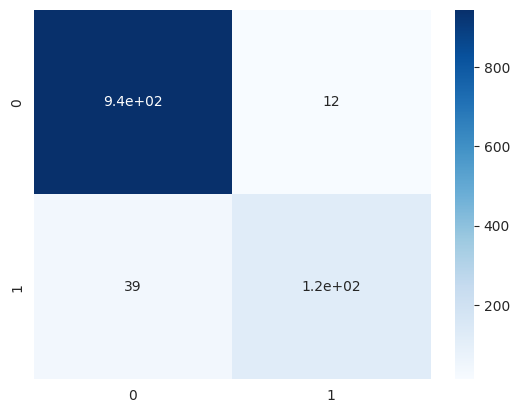

In [46]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.show()


# SVM Model

In [47]:
x = df["EmailText"]
y = df["Label"]

x_train,y_train = x[0:4457],y[0:4457]
x_test,y_test = x[4457:],y[4457:]



In [48]:
cv = CountVectorizer()  
features = cv.fit_transform(x_train)
tuned_parameters = {'kernel': ['rbf','linear'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}
model = GridSearchCV(svm.SVC(), tuned_parameters)
model.fit(features,y_train)




GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                         'kernel': ['rbf', 'linear']})

In [49]:
print(model.best_params_)


{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


***Accuracy***

In [50]:
print(model.score(cv.transform(x_test),y_test))


0.9775784753363229


***Confusion Matrix***

In [51]:
x_test_cv = cv.transform(x_test)
y_pred = model.predict(x_test_cv)
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[968   2]
 [ 23 122]]


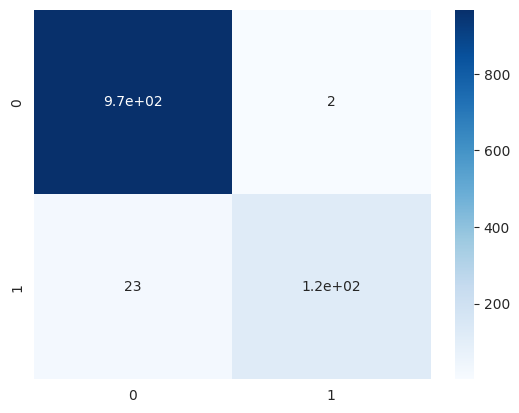

In [52]:
sns.heatmap(conf_matrix, annot=True, cmap="Blues")
plt.show()


***Classification Report***

In [53]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       970
        spam       0.98      0.84      0.91       145

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



***Test***

In [54]:
new_email = "Congratulations, you have won a free trip to Hawaii! Click the link to claim your prize now!"
new_email = new_email.lower()
new_email = remove_punctuation(new_email)
new_email = remove_stopwords(new_email)
new_email = tokenize_text(new_email)
new_email = [' '.join(new_email)]

new_email_vector = vectorizer.transform(new_email)

prediction = logreg.predict(new_email_vector)

print("Prediction:", prediction)

Prediction: ['spam']


In [55]:
new_email = "Hi John, I hope this email finds you well. I wanted to follow up on our conversation from last week about the upcoming project. Do you have any updates or questions for me? Let me know. Best regards, Sarah"
new_email = new_email.lower()
new_email = remove_punctuation(new_email)
new_email = remove_stopwords(new_email)
new_email = tokenize_text(new_email)
new_email = [' '.join(new_email)]

new_email_vector = vectorizer.transform(new_email)

prediction = logreg.predict(new_email_vector)

print("Prediction:", prediction)

Prediction: ['ham']
